#**Stochastic Gradient Descent**

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
#Load the california dataset
housing_data=fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
#Creating the target variable
Features=pd.DataFrame(housing_data.data,columns=housing_data.feature_names)
Target=pd.DataFrame(housing_data.target,columns=['Target'])

In [ ]:
df=Features.join(Target)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
#Explore the dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Remove the outliers
df=df[df.Target<3.5]
df=df[df.MedInc<8]

In [ ]:
#Describe the dataset
df[['MedInc','Target']].describe()

,MedInc,Target
count,17938.000000,17938.000000
mean,3.482030,1.722805
std,1.364922,0.749957
min,0.499900,0.149990
25%,2.452025,1.119000
50%,3.303600,1.635000
75%,4.346050,2.256000
max,7.988700,3.499000


In [ ]:
#Scaling the variables
def scale(x):
  min=np.min(x)
  max=np.max(x)
  return (x-min)/(max-min)

X=scale(df.MedInc)
y=scale(df.Target)

In [ ]:
#Implement SGD
X=df.MedInc.values # Convert to numpy array
y=df.Target.values # Convert to numpy array

def SGD(X,y,lr=0.05,epoch=10,batch_size=1):
  '''
  Stochastic Gradient Descent for single feature
  '''
  m,b=0.5,0.5 #Initial parameters
  log,mse=[],[] #Lists to store the learning process
  for _ in range(epoch):
    indexes=np.random.randint(0,len(X),batch_size)

    Xs=np.take(X,indexes)
    ys=np.take(y,indexes)
    N=len(Xs)

    f=ys-m*Xs-b
    m-=lr*(-2*Xs.dot(f).sum()/N)
    b-=lr*(-2*f.sum()/N)

    log.append((m,b))
    mse.append(mean_squared_error(y,m*X+b))
  return m,b,log,mse

In [ ]:
#Provide the parameters
m,b,log,mse=SGD(X,y,lr=0.01,epoch=10,batch_size=2)

In [ ]:
#Providing the y_predictions
y_pred=m*X+b
print("MSE",mean_squared_error(y,y_pred))

MSE 0.3435970145127978


# **Gradient Descent with Momentum**
## Problem with Gradient Descent
- Progression of the search can bounce around the search space based on the gradient
- This can slow down the progress of the search, especially for those optimization problems where the broader trend or shape of the search space is more useful than specific gradients along the way

## Momentum
- It is designed to accelerate the optimization process
- It is achieved by adding history to the parameter update equation based on the gradient encountered in the previous updates.
- We add an additional parameter that controls the amount of history(momentum) to include in the update equation


In [ ]:
#Import libraries
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
from numpy import arange

In [ ]:
#Objective function - the function we are trying to minimize
def objective(x):
  return x**2.0

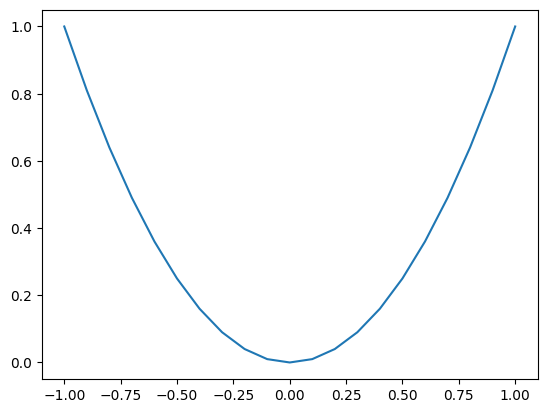

In [ ]:
#Visualize the function

#Define the range for function
r_min,r_max=-1.0,1.0

#Sample input range uniformly at 0.1 increments
inputs = arange(r_min,r_max+0.1,0.1)

#Compute targets
results=objective(inputs)

#Create a line plot
pyplot.plot(inputs,results)

#Show
pyplot.show()

#Show the plot
pyplot.show()

In [ ]:
#Gradeint Descent

#Objective function - the function we are trying to minimize
def objective(x):
  return x ** 2.0

#Derivative of objective function
def derivative(x):
  return x* 2.0

#GD
def GradientDescent(objective,derivative,bounds,n_iter,step_size,momentum):
  #Track all solutions
  solutions,scores = list(),list()

  #Generate an initial point
  solution=bounds[:,0]+rand(len(bounds))*(bounds[:,1]-bounds[:,0])

  #Keep track of all changes
  change=0.0

  #Run the gradient descent
  for i in range(n_iter):
    gradient = derivative(solutions)

    #Calculate update
    new_change=step_size*gradient+momentum*change

    #Take a step
    solution=solution-new_change

    #save the change
    change=new_change

    #Evaluate candidate point
    solution_eval=objective(solution)

    #Store solution
    solutions.append(solution)
    scores.append(solution_eval)

    #Report the progress
    print('>%d f(%s)=%.5f'%(i,solution,solution_eval))
  return [solutions,scores]

#seed the pseudo random generator
seed(4)

#Define the range for inpput
bounds=asarray([[-1.0,1.0]])

#Define total iterations
n_iter=30

#Define step_size
step_size=0.1

#Define momentum
momentum=0.3

#Run the gradient descent
solutions,scores=GradientDescent(objective,derivative,bounds,n_iter,step_size,momentum)

#sample input ranges uniformly at 0.1 increments
input=arange(bounds[0,0],bounds[0,1]+0.1,0.1)

#Compute targets
results=objective(inputs)

#Create a line plot
pyplot.plot(inputs,results)

#Show
pyplot.show()

#Show the plot
pyplot.show()

TypeError: can't multiply sequence by non-int of type 'float'